In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('/content/gender_submission.csv')

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0


In [8]:
#Identify Categorical Column (Important)

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
  data[col]=encoder.fit_transform(data[col])
print(df)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [11]:
x = df.iloc[:,0]
y = df.iloc[:,1]

In [12]:
import numpy as np

x = np.array(x)
y = np.array(y)

In [13]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2,random_state=42
)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model=LogisticRegression(class_weight='balanced')

In [42]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [43]:
y_pred = model.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [45]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)


Accuracy: 0.5238095238095238


In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print("Confusion Matrix:")
print("TP FP")
print("FN TN")
print(cm)


Confusion Matrix:
TP FP
FN TN
[[18 16]
 [24 26]]


In [50]:
precision = precision_score(y_test, y_pred, zero_division=0)
print("Precision:", precision)

Precision: 0.42857142857142855


In [51]:
recall = recall_score(y_test, y_pred, zero_division=0)
print("Recall:", recall)

Recall: 0.5294117647058824


In [52]:
f1 = f1_score(y_test, y_pred, zero_division=0)
print("F1-score:", f1)

F1-score: 0.47368421052631576


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])

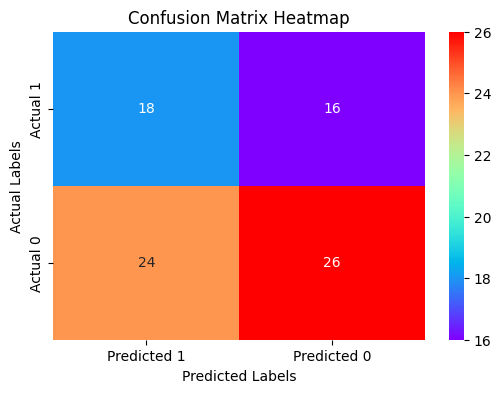

In [68]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='rainbow',
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [77]:
from sklearn.metrics import roc_curve, auc

In [78]:
y_prob = model.predict_proba(x_test)[:,1]

In [80]:
fpr,tpr,thresholds = roc_curve(y_test, y_prob)

In [81]:
roc_auc = auc(fpr,tpr)
print("AUC:",roc_auc)

AUC: 0.5229411764705882


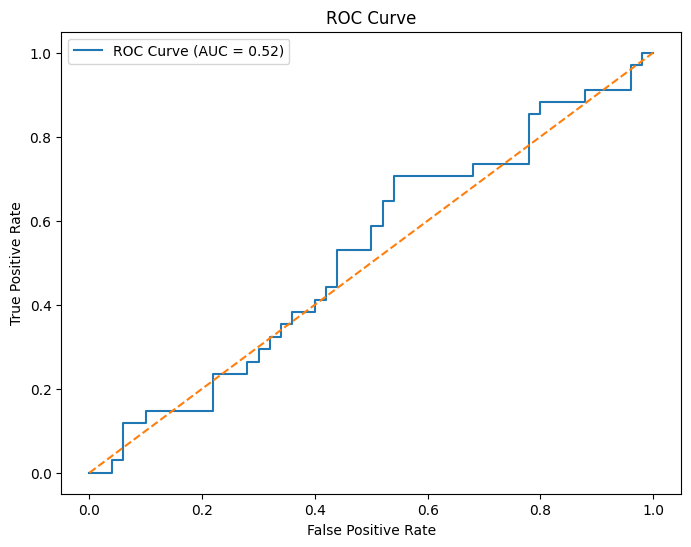

In [84]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--') #diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()